## Summary in code: section 2

Note that compared to the [dyadic decoder](dyadicDecoder.section1.ipynb) used in the code example of section 1, we make more use here of the [helper functions](helperFunctions.py).  This is because this encoding/decoding strategy is re-used many times in all the other examples whereas the dyadic decoder was introduced just to illustrate the so-called "scaffolding" strategy (*as it is referred to in the paper*).

### Generate random dataset in the unit interval

In [1]:
import numpy as np
np.random.seed(0)

numbDataPoints = 50
xs = np.random.uniform(0, 1, numbDataPoints)
print('xs = %s' % xs)

xs = [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077]


### Import all relevant functions and set value of $\tau$

In [2]:
# set tau = 8

from helperFunctions import *

In [3]:
decimalInitial = findInitialCondition(xs)

significance = 400 bits ; 119 digits (base-10) ; ratio = 3.361



In [4]:
print(decimalInitial)
print('\nnumber of decimal digita = %d' % len(str(decimalInitial)))

0.52847263822305822321414776131142334134424126841548996094257891002142562165617954914071030171163637703155000963962531642

number of decimal digita = 121


In [5]:
decodedValues = generateData(decimalInitial, len(xs))

### Compare data with ground truth and verify error bound

In [6]:
normalizedErrors = [abs(decodedValue - dataPoint) / (Pi / 2 ** (tau - 1)) 
                    for decodedValue, dataPoint in zip(decodedValues, xs)]

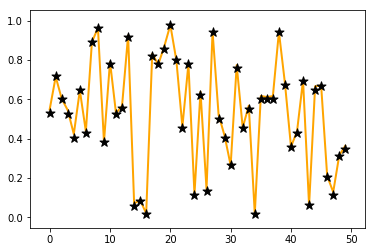

In [8]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp

plt.plot(range(numbDataPoints), xs, color='orange', lw=2, zorder=1)
plt.scatter(range(numbDataPoints), decodedValues, color='black', marker='*', s=90, zorder=2)

mp.savefig('resources/codeExamples/decodedValues_logistic.png')

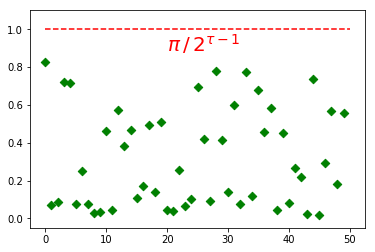

In [9]:
plt.scatter(range(numbDataPoints), normalizedErrors, color='green', marker='D')
plt.ylim(-0.05,1.1)
plt.hlines(1, 0, 50, color='red', linestyle='dashed')
plt.text(20, 0.88, r'$\pi \, / \, 2^{\tau - 1}$', fontsize=20, color='r')

mp.savefig('resources/codeExamples/normalizedError_logistic.png')